In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,10))
colors = sns.color_palette('coolwarm', len(asthma))
sns.barplot(x='state', y='prevalence_perc', data=asthma, palette=colors)
for index, value in enumerate(asthma['prevalence_perc']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.title('Asthma Prevalence by State')
plt.xlabel('State')
plt.ylabel('Prevalence Percentage')
plt.grid(True, axis='y')
plt.xticks(rotation=45)          
plt.tight_layout()
plt.show();

asthma_top10 = asthma.nlargest(10,'prevalence_perc')
asthma_top10.reset_index(drop=True)

sns.barplot(x='state', y='prevalence_perc',data=asthma_top10) 
plt.title('TOP 10 STATES ASTHMA REPORTED')
plt.show();

In [2]:
asthma_er_visit = pd.read_csv('../data/asthma_ER_visits.csv')

In [3]:
asthma_er_visit

,Column1,Emergency Department Visits Weighted Number of Visits,Emergency Department Visits Rate2 (SE),Hospital Inpatient Stays Weighted Number of Visits,Hospital Inpatient Stays Rate2 (SE)
0,Total,986453,29.8 (0.98),94560,2.9 (0.06)
1,Children (Age <18 years),270330,36.4 (2.69),27055,3.6 (0.21)
2,Adults (Age 18+ years),716117,27.8 (0.89),67505,2.6 (0.05)


In [4]:
asthma_er_visit.columns =['category', 'ER_visits_total', 'ER_visit_rate', 'inpatient_visits', 'inpatient_rate']

In [5]:
asthma_er_visit

,category,ER_visits_total,ER_visit_rate,inpatient_visits,inpatient_rate
0,Total,986453,29.8 (0.98),94560,2.9 (0.06)
1,Children (Age <18 years),270330,36.4 (2.69),27055,3.6 (0.21)
2,Adults (Age 18+ years),716117,27.8 (0.89),67505,2.6 (0.05)


In [6]:
asthma_er_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category          3 non-null      object
 1   ER_visits_total   3 non-null      int64 
 2   ER_visit_rate     3 non-null      object
 3   inpatient_visits  3 non-null      int64 
 4   inpatient_rate    3 non-null      object
dtypes: int64(2), object(3)
memory usage: 252.0+ bytes


In [7]:
asthma_er_visit.ER_visit_rate = asthma_er_visit.ER_visit_rate.str[:-7]

In [8]:
asthma_er_visit.inpatient_rate = asthma_er_visit.inpatient_rate.str[:-7]

asthma_er_visit.ER_visit_rate = asthma_er_visit.ER_visit_rate.apply(lambda x: str(x) + '%')

asthma_er_visit.inpatient_rate = asthma_er_visit.inpatient_rate.apply(lambda x: str(x) + '%')

In [9]:
asthma_er_visit

,category,ER_visits_total,ER_visit_rate,inpatient_visits,inpatient_rate
0,Total,986453,29.8,94560,2.9
1,Children (Age <18 years),270330,36.4,27055,3.6
2,Adults (Age 18+ years),716117,27.8,67505,2.6


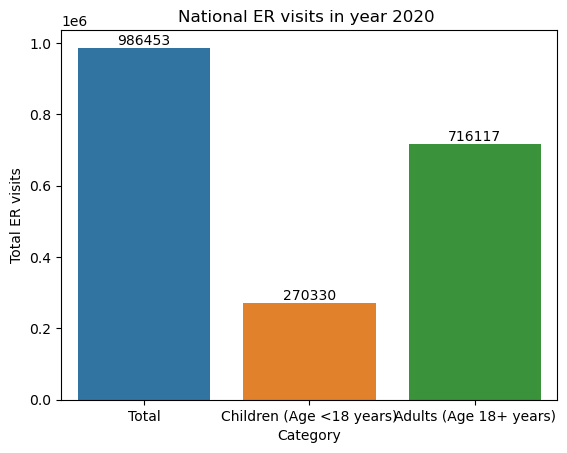

In [10]:
sns.barplot(x='category', y ='ER_visits_total', data=asthma_er_visit)
for index, value in enumerate(asthma_er_visit['ER_visits_total']):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.title('National ER visits in year 2020 ')
plt.xlabel('Category')
plt.ylabel('Total ER visits');

In [11]:
asthma_er_visit.to_csv('asthma_er_visit.csv',index=False)

In [12]:
mortality_rate = pd.read_csv('../data/asthma_mortality_rate.csv')

In [13]:
mortality_rate

,State,Number of Deaths1,Crude Death Rate (SE)1 Per Million,"Adjusted Death Rate (SE)1,2 Per Million"
0,Alabama,67,13.3 (1.62),11.6 (1.46)
1,Alaska,11,— (4.53),— (4.87)
2,Arizona,89,12.2 (1.30),10.3 (1.12)
3,Arkansas,37,12.2 (2.01),11.2 (1.90)
4,California,352,9.0 (0.48),8.2 (0.44)
5,Colorado,49,8.4 (1.20),7.6 (1.11)
6,Connecticut,35,9.7 (1.64),8.5 (1.50)
7,Delaware,15,— (3.86),— (3.73)
8,District of Columbia,14,— (5.58),— (5.64)
9,Florida,204,9.4 (0.66),8.0 (0.59)


In [14]:
mortality_rate

,State,Number of Deaths1,Crude Death Rate (SE)1 Per Million,"Adjusted Death Rate (SE)1,2 Per Million"
0,Alabama,67,13.3 (1.62),11.6 (1.46)
1,Alaska,11,— (4.53),— (4.87)
2,Arizona,89,12.2 (1.30),10.3 (1.12)
3,Arkansas,37,12.2 (2.01),11.2 (1.90)
4,California,352,9.0 (0.48),8.2 (0.44)
5,Colorado,49,8.4 (1.20),7.6 (1.11)
6,Connecticut,35,9.7 (1.64),8.5 (1.50)
7,Delaware,15,— (3.86),— (3.73)
8,District of Columbia,14,— (5.58),— (5.64)
9,Florida,204,9.4 (0.66),8.0 (0.59)


In [15]:
asthma2 = pd.read_csv('../data/asthma_ages.csv')

In [16]:
asthma2

,Characteristic1,Number of Deaths2,Death Rate2 Per Million (SE)
0,Total,"3,517",10.6 (0.18)
1,Children (Age <18 years),145,2.0 (0.16)
2,Adults (Age 18+ years),"3,372",13.1 (0.22)
3,Age Groups (Years),Age Groups (Years),Age Groups (Years)
4,0–4,26,1.4 (0.27)
5,5–11,68,2.4 (0.29)
6,12–17,51,2.0 (0.27)
7,18–24,113,3.8 (0.35)
8,25–34,293,6.4 (0.38)
9,35–64,"1,453",11.5 (0.30)


In [17]:
asthma_states = pd.read_csv('../data/asthma_states.csv')

In [18]:
asthma_states

,State,Child Count,Child Percent,Child Year,Adult Count,Adult Percent
0,Alabama,"141,500",13.2%,2014.0,394600,0.105
1,Alaska,---,---,NaN,50700,0.092
2,Arizona,"129,200",8.1%,2016.0,545100,0.100
3,Arkansas,---,---,NaN,225900,0.098
4,California,"542,700",6.2%,NaN,2607600,0.085
5,Colorado,---,---,NaN,399400,0.091
6,Connecticut,"62,400",9.7%,NaN,290300,0.103
7,Delaware,---,---,NaN,77000,0.101
8,District of Columbia,"12,700",10.9%,NaN,66400,0.116
9,Florida,"302,100",7.5%,NaN,1495600,0.087


In [19]:
asthma_adults = pd.read_csv('../data/asthma_adults_2021.csv')

In [20]:
asthma_adults

,State or Territory,Number With Current Asthma,Percent With Current Asthma (SE)
0,Alabama,"394,199",10.1 (0.62)
1,Alaska,"49,453",9.0 (0.58)
2,Arizona,"519,749",9.4 (0.39)
3,Arkansas,"207,857",9.0 (0.62)
4,California,"2,694,396",8.8 (0.45)
5,Colorado,"476,932",10.4 (0.37)
6,Connecticut,"300,910",10.5 (0.48)
7,Delaware,"77,695",9.8 (0.69)
8,District of Columbia,"64,298",11.6 (0.82)
9,Florida,—,—


In [21]:
asthma_adults.columns =['state', 'asthma_total', 'asthma_perc']
asthma_adults.asthma_perc = asthma_adults.asthma_perc.str[:-7]
asthma_adults

,state,asthma_total,asthma_perc
0,Alabama,"394,199",10.1
1,Alaska,"49,453",9.0
2,Arizona,"519,749",9.4
3,Arkansas,"207,857",9.0
4,California,"2,694,396",8.8
5,Colorado,"476,932",10.4
6,Connecticut,"300,910",10.5
7,Delaware,"77,695",9.8
8,District of Columbia,"64,298",11.6
9,Florida,—,


In [22]:
asthma_adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         54 non-null     object
 1   asthma_total  54 non-null     object
 2   asthma_perc   54 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


In [23]:
asthma_adults = asthma_adults.drop([8,51,52,53])
asthma_adults = asthma_adults.reset_index(drop=True)

In [24]:
asthma_adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         50 non-null     object
 1   asthma_total  50 non-null     object
 2   asthma_perc   50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [25]:
asthma_adults

,state,asthma_total,asthma_perc
0,Alabama,"394,199",10.1
1,Alaska,"49,453",9.0
2,Arizona,"519,749",9.4
3,Arkansas,"207,857",9.0
4,California,"2,694,396",8.8
5,Colorado,"476,932",10.4
6,Connecticut,"300,910",10.5
7,Delaware,"77,695",9.8
8,Florida,—,
9,Georgia,"772,663",9.4


In [26]:
np = asthma_adults.asthma_perc.replace('', np.nan)

In [27]:
np

0     10.1
1      9.0
2      9.4
3      9.0
4      8.8
5     10.4
6     10.5
7      9.8
8      NaN
9      9.4
10     8.1
11     9.8
12     8.7
13    10.3
14     9.1
15    10.6
16    11.7
17     9.7
18    12.5
19     9.4
20    11.7
21    11.5
22     8.8
23    10.0
24     9.4
25     9.7
26     8.2
27     9.1
28    12.1
29     8.9
30    10.6
31     9.8
32     8.7
33     8.4
34    10.4
35    10.9
36    11.2
37    10.3
38    12.6
39     9.2
40     8.3
41    10.3
42     8.4
43     9.7
44    11.8
45     9.8
46    10.5
47    12.1
48    10.8
49     9.7
Name: asthma_perc, dtype: object

In [28]:
asthma_adults['asthma_perc'] = np.fillna(0)

In [29]:
asthma_adults['asthma_total'] = asthma_adults.asthma_total.replace('-',0)

In [30]:
asthma_adults

,state,asthma_total,asthma_perc
0,Alabama,"394,199",10.1
1,Alaska,"49,453",9.0
2,Arizona,"519,749",9.4
3,Arkansas,"207,857",9.0
4,California,"2,694,396",8.8
5,Colorado,"476,932",10.4
6,Connecticut,"300,910",10.5
7,Delaware,"77,695",9.8
8,Florida,—,0
9,Georgia,"772,663",9.4


In [31]:
asthma_adults['asthma_perc'] = asthma_adults['asthma_perc'].astype(float)

In [32]:
asthma_adults

,state,asthma_total,asthma_perc
0,Alabama,"394,199",10.1
1,Alaska,"49,453",9.0
2,Arizona,"519,749",9.4
3,Arkansas,"207,857",9.0
4,California,"2,694,396",8.8
5,Colorado,"476,932",10.4
6,Connecticut,"300,910",10.5
7,Delaware,"77,695",9.8
8,Florida,—,0.0
9,Georgia,"772,663",9.4


In [33]:
asthma_adults.to_csv('asthma_data_adults.csv', index=False)

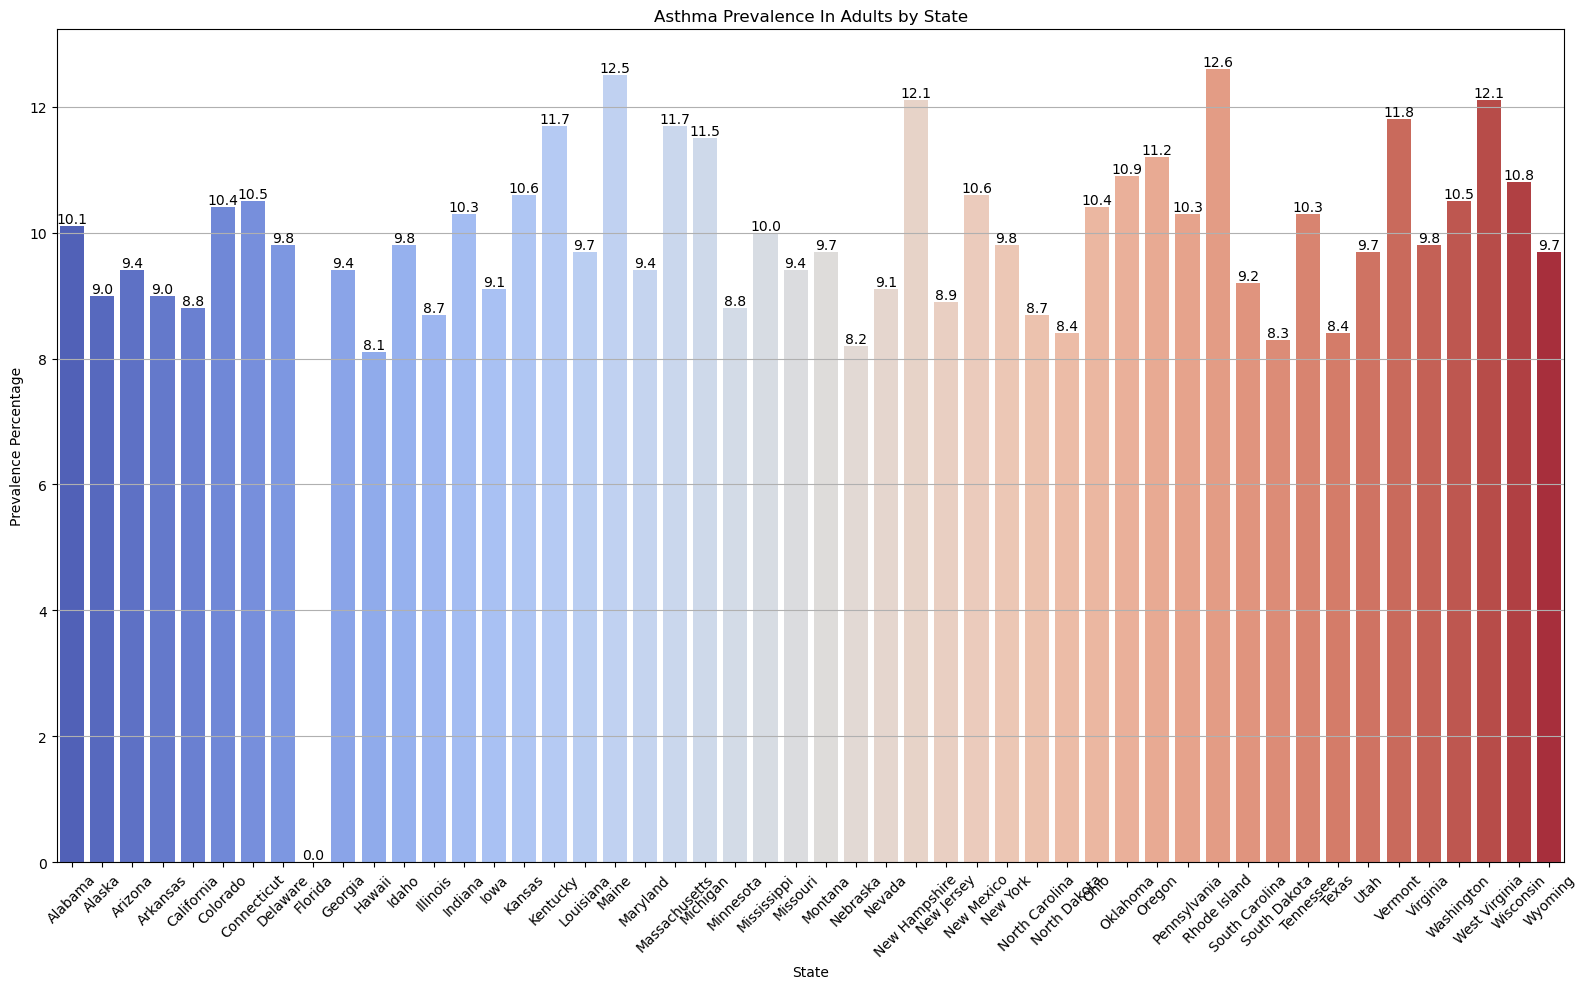

In [34]:
plt.figure(figsize=(16,10))
colors = sns.color_palette('coolwarm', len(asthma_adults))
sns.barplot(x='state', y='asthma_perc', data=asthma_adults, palette=colors)
for index, value in enumerate(asthma_adults['asthma_perc']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.title('Asthma Prevalence In Adults by State')
plt.xlabel('State')
plt.ylabel('Prevalence Percentage')
plt.grid(True, axis='y')
plt.xticks(rotation=45)          
plt.tight_layout()
plt.show();

In [35]:
states = pd.read_csv('../data/us-states-territories.csv')

In [36]:
states.head(15)

,Type,Name,Abbreviation,Capital,Population (2015),Population (2019),area (square miles)
0,State,Alabama,AL,Montgomery,NaN,"4,903,185","52,420"
1,State,Alaska,AK,Juneau,NaN,"731,545","665,384"
2,State,Arizona,AZ,Phoenix,NaN,"7,278,717","113,990"
3,State,Arkansas,AR,Little Rock,NaN,"3,017,804","53,179"
4,State,California,CA,Sacramento,NaN,"39,512,223","163,695"
5,State,Colorado,CO,Denver,NaN,"5,758,736","104,094"
6,State,Connecticut,CT,Hartford,NaN,"3,565,278","5,543"
7,State,Delaware,DE,Dover,NaN,"973,764","2,489"
8,State,Florida,FL,Tallahassee,NaN,"21,477,737","65,758"
9,State,Georgia,GA,Atlanta,NaN,"10,617,423","59,425"


In [37]:
states = states.drop(columns=['Type', 'Capital', 'Population (2015)', 'Population (2019)', 'area (square miles)'])

In [38]:
states = states.drop([50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]).reset_index(drop=True)

In [39]:
states[['state', 'other']] = states['Name'].str.split('[',n=1,expand=True)

In [40]:
states['state'] = states.state.str.strip()

In [41]:
asthma_states = pd.merge(left = asthma_adults, right = states, on ='state')
asthma_states

,state,asthma_total,asthma_perc,Name,Abbreviation,other
0,Alabama,"394,199",10.1,Alabama,AL,None
1,Alaska,"49,453",9.0,Alaska,AK,None
2,Arizona,"519,749",9.4,Arizona,AZ,None
3,Arkansas,"207,857",9.0,Arkansas,AR,None
4,California,"2,694,396",8.8,California,CA,None
5,Colorado,"476,932",10.4,Colorado,CO,None
6,Connecticut,"300,910",10.5,Connecticut,CT,None
7,Delaware,"77,695",9.8,Delaware,DE,None
8,Florida,—,0.0,Florida,FL,None
9,Georgia,"772,663",9.4,Georgia,GA,None


In [42]:
asthma_states['Abbreviation'] = asthma_states.Abbreviation.str.strip()

In [43]:
air_data = pd.read_csv('../data/air_index.csv')

In [44]:
air_data

,CBSA Code,CBSA,# Days with AQI,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous,AQI Maximum,...,AQI Median,# Days CO,# Days NO2,# Days O3,# Days PM2.5,# Days PM10,city/county,state,state_name,other
0,31080,"Los Angeles-Long Beach-Anaheim, CA",365,39,228,71,26,1,.,281,...,77.0,.,23,164,170,8,Los Angeles-Long Beach-Anaheim,CA,CA,NaN
1,38060,"Phoenix-Mesa-Scottsdale, AZ",365,11,116,103,62,73,.,272,...,125.0,.,.,274,23,68,Phoenix-Mesa-Scottsdale,AZ,AZ,NaN
2,22020,"Fargo, ND-MN",363,278,68,8,9,.,.,192,...,37.0,.,2,187,174,.,Fargo,ND-MN,ND,MN
3,14860,"Bridgeport-Stamford-Norwalk, CT",363,277,67,13,6,.,.,185,...,42.0,.,21,172,170,.,Bridgeport-Stamford-Norwalk,CT,CT,NaN
4,43620,"Sioux Falls, SD",349,285,59,3,2,.,.,182,...,36.0,.,13,222,87,27,Sioux Falls,SD,SD,NaN
5,33460,"Minneapolis-St. Paul-Bloomington, MN-WI",365,230,127,5,3,.,.,182,...,44.0,.,7,169,159,30,Minneapolis-St. Paul-Bloomington,MN-WI,MN,WI
6,26420,"Houston-The Woodlands-Sugar Land, TX",365,141,194,21,9,.,.,179,...,54.0,.,3,138,207,17,Houston-The Woodlands-Sugar Land,TX,TX,NaN
7,19740,"Denver-Aurora-Lakewood, CO",365,105,190,53,17,.,.,177,...,62.0,.,53,243,43,26,Denver-Aurora-Lakewood,CO,CO,NaN
8,41620,"Salt Lake City, UT",365,151,165,40,9,.,.,177,...,58.0,.,24,246,83,12,Salt Lake City,UT,UT,NaN
9,42660,"Seattle-Tacoma-Bellevue, WA",365,263,95,5,2,.,.,177,...,43.0,.,6,220,139,.,Seattle-Tacoma-Bellevue,WA,WA,NaN


In [45]:
air_data['state_name'] = air_data.state_name.str.strip()

In [46]:
asthma_states = pd.merge(left = asthma_adults, right = states, on ='state')

In [47]:
asthma_states

,state,asthma_total,asthma_perc,Name,Abbreviation,other
0,Alabama,"394,199",10.1,Alabama,AL,None
1,Alaska,"49,453",9.0,Alaska,AK,None
2,Arizona,"519,749",9.4,Arizona,AZ,None
3,Arkansas,"207,857",9.0,Arkansas,AR,None
4,California,"2,694,396",8.8,California,CA,None
5,Colorado,"476,932",10.4,Colorado,CO,None
6,Connecticut,"300,910",10.5,Connecticut,CT,None
7,Delaware,"77,695",9.8,Delaware,DE,None
8,Florida,—,0.0,Florida,FL,None
9,Georgia,"772,663",9.4,Georgia,GA,None


In [48]:
asthma_states.Abbreviation = asthma_states.Abbreviation.str.strip()

In [49]:
asthma_air = pd.merge(left = asthma_states, right = air_data,
                      left_on = 'Abbreviation' , right_on = 'state_name')

In [50]:
asthma_air

,state_x,asthma_total,asthma_perc,Name,Abbreviation,other_x,CBSA Code,CBSA,# Days with AQI,Good,...,AQI Median,# Days CO,# Days NO2,# Days O3,# Days PM2.5,# Days PM10,city/county,state_y,state_name,other_y
0,Alabama,"394,199",10.1,Alabama,AL,None,26620,"Huntsville, AL",357,269,...,41.0,.,.,112,232,13,Huntsville,AL,AL,NaN
1,Alaska,"49,453",9.0,Alaska,AK,None,11260,"Anchorage, AK",365,293,...,25.0,.,.,0,266,99,Anchorage,AK,AK,NaN
2,Arizona,"519,749",9.4,Arizona,AZ,None,38060,"Phoenix-Mesa-Scottsdale, AZ",365,11,...,125.0,.,.,274,23,68,Phoenix-Mesa-Scottsdale,AZ,AZ,NaN
3,Arkansas,"207,857",9.0,Arkansas,AR,None,30780,"Little Rock-North Little Rock-Conway, AR",365,213,...,47.0,.,6,96,263,.,Little Rock-North Little Rock-Conway,AR,AR,NaN
4,California,"2,694,396",8.8,California,CA,None,31080,"Los Angeles-Long Beach-Anaheim, CA",365,39,...,77.0,.,23,164,170,8,Los Angeles-Long Beach-Anaheim,CA,CA,NaN
5,Colorado,"476,932",10.4,Colorado,CO,None,19740,"Denver-Aurora-Lakewood, CO",365,105,...,62.0,.,53,243,43,26,Denver-Aurora-Lakewood,CO,CO,NaN
6,Connecticut,"300,910",10.5,Connecticut,CT,None,14860,"Bridgeport-Stamford-Norwalk, CT",363,277,...,42.0,.,21,172,170,.,Bridgeport-Stamford-Norwalk,CT,CT,NaN
7,Delaware,"77,695",9.8,Delaware,DE,None,20100,"Dover, DE",360,308,...,38.0,.,.,251,109,.,Dover,DE,DE,NaN
8,Florida,—,0.0,Florida,FL,None,27260,"Jacksonville, FL",365,268,...,43.0,.,.,119,246,.,Jacksonville,FL,FL,NaN
9,Georgia,"772,663",9.4,Georgia,GA,None,12060,"Atlanta-Sandy Springs-Roswell, GA",365,209,...,47.0,.,6,147,212,.,Atlanta-Sandy Springs-Roswell,GA,GA,NaN


In [51]:
asthma_air = asthma_air.drop(columns =['CBSA','Name','CBSA Code','other_x', 'state_y', 'other_y','state_name'])

In [52]:
asthma_air = asthma_air.rename(columns = {'state_x': 'state_name', '# Days with AQI':'total_days_AQI', 'AQI Maximum' :'max_AQI','state_name': 'state'})

In [53]:
#asthma_air.asthma_perc = asthma_air.asthma_perc.apply(lambda x: str(x) + '%')

In [54]:
asthma_air

,state_name,asthma_total,asthma_perc,Abbreviation,total_days_AQI,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous,max_AQI,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,# Days PM2.5,# Days PM10,city/county
0,Alabama,"394,199",10.1,AL,357,269,86,2,.,.,.,105,58,41.0,.,.,112,232,13,Huntsville
1,Alaska,"49,453",9.0,AK,365,293,68,3,1,.,.,160,57,25.0,.,.,0,266,99,Anchorage
2,Arizona,"519,749",9.4,AZ,365,11,116,103,62,73,.,272,213,125.0,.,.,274,23,68,Phoenix-Mesa-Scottsdale
3,Arkansas,"207,857",9.0,AR,365,213,150,2,.,.,.,112,70,47.0,.,6,96,263,.,Little Rock-North Little Rock-Conway
4,California,"2,694,396",8.8,CA,365,39,228,71,26,1,.,281,143,77.0,.,23,164,170,8,Los Angeles-Long Beach-Anaheim
5,Colorado,"476,932",10.4,CO,365,105,190,53,17,.,.,177,126,62.0,.,53,243,43,26,Denver-Aurora-Lakewood
6,Connecticut,"300,910",10.5,CT,363,277,67,13,6,.,.,185,71,42.0,.,21,172,170,.,Bridgeport-Stamford-Norwalk
7,Delaware,"77,695",9.8,DE,360,308,50,2,.,.,.,108,54,38.0,.,.,251,109,.,Dover
8,Florida,—,0.0,FL,365,268,97,.,.,.,.,93,59,43.0,.,.,119,246,.,Jacksonville
9,Georgia,"772,663",9.4,GA,365,209,148,8,.,.,.,150,77,47.0,.,6,147,212,.,Atlanta-Sandy Springs-Roswell


In [55]:
asthma_air.asthma_total = asthma_air.asthma_total.str.replace(',', '')

In [56]:
asthma_air['asthma_total'] = asthma_air['asthma_total'].replace('-',0)                 

In [57]:
asthma_air

,state_name,asthma_total,asthma_perc,Abbreviation,total_days_AQI,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous,max_AQI,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,# Days PM2.5,# Days PM10,city/county
0,Alabama,394199,10.1,AL,357,269,86,2,.,.,.,105,58,41.0,.,.,112,232,13,Huntsville
1,Alaska,49453,9.0,AK,365,293,68,3,1,.,.,160,57,25.0,.,.,0,266,99,Anchorage
2,Arizona,519749,9.4,AZ,365,11,116,103,62,73,.,272,213,125.0,.,.,274,23,68,Phoenix-Mesa-Scottsdale
3,Arkansas,207857,9.0,AR,365,213,150,2,.,.,.,112,70,47.0,.,6,96,263,.,Little Rock-North Little Rock-Conway
4,California,2694396,8.8,CA,365,39,228,71,26,1,.,281,143,77.0,.,23,164,170,8,Los Angeles-Long Beach-Anaheim
5,Colorado,476932,10.4,CO,365,105,190,53,17,.,.,177,126,62.0,.,53,243,43,26,Denver-Aurora-Lakewood
6,Connecticut,300910,10.5,CT,363,277,67,13,6,.,.,185,71,42.0,.,21,172,170,.,Bridgeport-Stamford-Norwalk
7,Delaware,77695,9.8,DE,360,308,50,2,.,.,.,108,54,38.0,.,.,251,109,.,Dover
8,Florida,—,0.0,FL,365,268,97,.,.,.,.,93,59,43.0,.,.,119,246,.,Jacksonville
9,Georgia,772663,9.4,GA,365,209,148,8,.,.,.,150,77,47.0,.,6,147,212,.,Atlanta-Sandy Springs-Roswell


In [58]:
asthma_air = asthma_air.iloc[:,[0,19,3,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

In [68]:
asthma_air

,state_name,city/county,state,asthma_total,asthma_perc,total_days_AQI,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous,max_AQI,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,# Days PM2.5,# Days PM10
0,Alabama,Huntsville,AL,394199,10.1,357,269,86,2,.,.,.,105,58,41.0,.,.,112,232,13
1,Alaska,Anchorage,AK,49453,9.0,365,293,68,3,1,.,.,160,57,25.0,.,.,0,266,99
2,Arizona,Phoenix-Mesa-Scottsdale,AZ,519749,9.4,365,11,116,103,62,73,.,272,213,125.0,.,.,274,23,68
3,Arkansas,Little Rock-North Little Rock-Conway,AR,207857,9.0,365,213,150,2,.,.,.,112,70,47.0,.,6,96,263,.
4,California,Los Angeles-Long Beach-Anaheim,CA,2694396,8.8,365,39,228,71,26,1,.,281,143,77.0,.,23,164,170,8
5,Colorado,Denver-Aurora-Lakewood,CO,476932,10.4,365,105,190,53,17,.,.,177,126,62.0,.,53,243,43,26
6,Connecticut,Bridgeport-Stamford-Norwalk,CT,300910,10.5,363,277,67,13,6,.,.,185,71,42.0,.,21,172,170,.
7,Delaware,Dover,DE,77695,9.8,360,308,50,2,.,.,.,108,54,38.0,.,.,251,109,.
8,Florida,Jacksonville,FL,—,0.0,365,268,97,.,.,.,.,93,59,43.0,.,.,119,246,.
9,Georgia,Atlanta-Sandy Springs-Roswell,GA,772663,9.4,365,209,148,8,.,.,.,150,77,47.0,.,6,147,212,.


In [69]:
asthma_air.loc[8,'asthma_total'] = 0

In [71]:
asthma_air

,state_name,city/county,state,asthma_total,asthma_perc,total_days_AQI,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous,max_AQI,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,# Days PM2.5,# Days PM10
0,Alabama,Huntsville,AL,394199,10.1,357,269,86,2,.,.,.,105,58,41.0,.,.,112,232,13
1,Alaska,Anchorage,AK,49453,9.0,365,293,68,3,1,.,.,160,57,25.0,.,.,0,266,99
2,Arizona,Phoenix-Mesa-Scottsdale,AZ,519749,9.4,365,11,116,103,62,73,.,272,213,125.0,.,.,274,23,68
3,Arkansas,Little Rock-North Little Rock-Conway,AR,207857,9.0,365,213,150,2,.,.,.,112,70,47.0,.,6,96,263,.
4,California,Los Angeles-Long Beach-Anaheim,CA,2694396,8.8,365,39,228,71,26,1,.,281,143,77.0,.,23,164,170,8
5,Colorado,Denver-Aurora-Lakewood,CO,476932,10.4,365,105,190,53,17,.,.,177,126,62.0,.,53,243,43,26
6,Connecticut,Bridgeport-Stamford-Norwalk,CT,300910,10.5,363,277,67,13,6,.,.,185,71,42.0,.,21,172,170,.
7,Delaware,Dover,DE,77695,9.8,360,308,50,2,.,.,.,108,54,38.0,.,.,251,109,.
8,Florida,Jacksonville,FL,0,0.0,365,268,97,.,.,.,.,93,59,43.0,.,.,119,246,.
9,Georgia,Atlanta-Sandy Springs-Roswell,GA,772663,9.4,365,209,148,8,.,.,.,150,77,47.0,.,6,147,212,.


In [63]:
asthma_air[['asthma_perc', 'max_AQI']].corr()

,asthma_perc,max_AQI
asthma_perc,1.000000,0.016166
max_AQI,0.016166,1.000000


In [64]:
asthma_air[['asthma_perc', 'Good']].corr()

,asthma_perc,Good
asthma_perc,1.000000,0.043703
Good,0.043703,1.000000


In [ ]:
asthma_air

In [65]:
asthma_air = asthma_air.rename(columns ={'Abbreviation': 'state'})

In [66]:
asthma_air = asthma_air.drop_duplicates()

In [67]:
asthma_air

,state_name,city/county,state,asthma_total,asthma_perc,total_days_AQI,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous,max_AQI,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,# Days PM2.5,# Days PM10
0,Alabama,Huntsville,AL,394199,10.1,357,269,86,2,.,.,.,105,58,41.0,.,.,112,232,13
1,Alaska,Anchorage,AK,49453,9.0,365,293,68,3,1,.,.,160,57,25.0,.,.,0,266,99
2,Arizona,Phoenix-Mesa-Scottsdale,AZ,519749,9.4,365,11,116,103,62,73,.,272,213,125.0,.,.,274,23,68
3,Arkansas,Little Rock-North Little Rock-Conway,AR,207857,9.0,365,213,150,2,.,.,.,112,70,47.0,.,6,96,263,.
4,California,Los Angeles-Long Beach-Anaheim,CA,2694396,8.8,365,39,228,71,26,1,.,281,143,77.0,.,23,164,170,8
5,Colorado,Denver-Aurora-Lakewood,CO,476932,10.4,365,105,190,53,17,.,.,177,126,62.0,.,53,243,43,26
6,Connecticut,Bridgeport-Stamford-Norwalk,CT,300910,10.5,363,277,67,13,6,.,.,185,71,42.0,.,21,172,170,.
7,Delaware,Dover,DE,77695,9.8,360,308,50,2,.,.,.,108,54,38.0,.,.,251,109,.
8,Florida,Jacksonville,FL,—,0.0,365,268,97,.,.,.,.,93,59,43.0,.,.,119,246,.
9,Georgia,Atlanta-Sandy Springs-Roswell,GA,772663,9.4,365,209,148,8,.,.,.,150,77,47.0,.,6,147,212,.


In [ ]:
asthma_air.to_csv('asthma_air_new.csv', index=False)

In [2]:
asthma_race = pd.read_csv('../data/asthma_by_race(2019-2021).csv')

In [3]:
asthma_race

,Race and Ethnicity,Total3 \nWith Asthma Attack Weighted Number,Total3 \nWith Asthma Attack Percent4 (SE),Children \nAge <18 years \nWith Asthma Attack1 Weighted Number,Children \nAge <18 years \nWith Asthma Attack1 Percent4 (SE),Adults \nAge 18+ years \nWith Asthma Attack1 Weighted Number,Adults \nAge 18+ years \nWith Asthma Attack1 Percent4 (SE)
0,White NH,6228357,42.1 (0.85),884799,42.7 (2.12),5343559,42.0 (0.95)
1,Black NH,1570637,37.6 (1.97),415410,39.3 (3.55),1155228,37.0 (2.15)
2,AI/AN NH,248982,44.0 (5.37),49698,47.9 (10.60),199284,43.1 (5.59)
3,Asian NH,297084,40.1 (3.90),47159,43.3 (7.76),249925,39.6 (4.19)
4,Multiple NH,226121,36.3 (4.06),106438,48.1 (6.13),119683,29.8 (5.15)
5,Hispanic,1560489,39.8 (1.99),454698,41.2 (3.58),1105791,39.3 (2.42)
6,Mexican,746911,38.0 (2.83),243092,40.1 (5.00),503819,37.0 (3.74)
7,Other Hispanic,785373,41.4 (2.59),203114,42.0 (5.10),582258,41.2 (3.01)


In [5]:
asthma_race.columns = ['race_ethnicity', 'total_asthma_attack', 'total_perc', 'children', 'children_perc', 'adults', 'adults_perc']

In [6]:
asthma_race

,race_ethnicity,total_asthma_attack,total_perc,children,children_perc,adults,adults_perc
0,White NH,6228357,42.1 (0.85),884799,42.7 (2.12),5343559,42.0 (0.95)
1,Black NH,1570637,37.6 (1.97),415410,39.3 (3.55),1155228,37.0 (2.15)
2,AI/AN NH,248982,44.0 (5.37),49698,47.9 (10.60),199284,43.1 (5.59)
3,Asian NH,297084,40.1 (3.90),47159,43.3 (7.76),249925,39.6 (4.19)
4,Multiple NH,226121,36.3 (4.06),106438,48.1 (6.13),119683,29.8 (5.15)
5,Hispanic,1560489,39.8 (1.99),454698,41.2 (3.58),1105791,39.3 (2.42)
6,Mexican,746911,38.0 (2.83),243092,40.1 (5.00),503819,37.0 (3.74)
7,Other Hispanic,785373,41.4 (2.59),203114,42.0 (5.10),582258,41.2 (3.01)


In [7]:
asthma_race['total_perc'] = asthma_race.total_perc.str[:-7]

In [8]:
asthma_race['children_perc'] = asthma_race.children_perc.str[:-7]

In [9]:
asthma_race['adults_perc'] = asthma_race.adults_perc.str[:-7]

In [10]:
asthma_race

,race_ethnicity,total_asthma_attack,total_perc,children,children_perc,adults,adults_perc
0,White NH,6228357,42.1,884799,42.7,5343559,42.0
1,Black NH,1570637,37.6,415410,39.3,1155228,37.0
2,AI/AN NH,248982,44.0,49698,47.9,199284,43.1
3,Asian NH,297084,40.1,47159,43.3,249925,39.6
4,Multiple NH,226121,36.3,106438,48.1,119683,29.8
5,Hispanic,1560489,39.8,454698,41.2,1105791,39.3
6,Mexican,746911,38.0,243092,40.1,503819,37.0
7,Other Hispanic,785373,41.4,203114,42.0,582258,41.2


In [12]:
asthma_race.to_csv('asthma_race_sun.csv', index= False)